In [1]:
import os 
import sys
sys.path.insert(0, os.path.dirname(os.getcwd()))

In [2]:
import pandas as pd
from scripts.database import DataBaseConnection
from scripts.userAnalysis import UserAnalysis
from dotenv import load_dotenv

# loading enviromental variable from .env
load_dotenv()

True

#### Database Connection

In [3]:
host=os.getenv("DB_HOST")
database=os.getenv("DB_DATABASE")
user=os.getenv("DB_USER")
password=os.getenv("DB_PASSWORD")
port=os.getenv("DB_PORT")
db=DataBaseConnection(host, database, user,password,port)

In [4]:
user_analysis=UserAnalysis()

In [5]:

db_connection=user_analysis.creating_connection(db)

Connection to PostgreSQL successful


### Data Understanding and Exploration
#### **Objective:**

- Load the dataset and explore it to understand the data structure, variables, and types.
- Identify the key variables related to user behavior and device preferences.

In [6]:
df=user_analysis.read_data(db,db_connection)

Connection to PostgreSQL closed


In [7]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [8]:
df.columns


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [9]:
df.shape

(150001, 55)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [11]:
print(df.isnull().sum())

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

- Top 3 Handset Manufacturers

In [12]:

top_3_manufacturers=user_analysis.top_3_manufacturers(df)

top_3_manufacturers Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


- 10 Handsets Used by Customers

In [13]:

top_10_handsets=user_analysis.top_10_handset(df)

top_10_handsets Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


- Top 5 Handsets per Top 3 Manufacturers

In [14]:
top_5_handset_top3_manufacturer=user_analysis.top_5HandsetPer_top3_manufacturer(df, top_3_manufacturers)

Top 5 handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64
Top 5 handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64
Top 5 handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


### Users’ Behavior on Applications
- Aggregate Data Per User

In [15]:
user_analysis.user_behavior_analysis(df)

,MSISDN/Number,Bearer Id,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total Data (Bytes)
0,3.360100e+10,1,116720.0,8.426375e+08,36053108.0,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0,8.786906e+08
1,3.360100e+10,1,181230.0,1.207552e+08,36104459.0,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0,1.568596e+08
2,3.360100e+10,1,134969.0,5.566597e+08,39306820.0,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0,5.959665e+08
3,3.360101e+10,1,49878.0,4.019932e+08,20327526.0,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0,4.223207e+08
4,3.360101e+10,2,37104.0,1.363130e+09,94280527.0,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0,1.457411e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106851,3.379000e+10,1,8810.0,6.879252e+08,26716429.0,234320.0,65863.0,6834178.0,697091.0,480946.0,525969.0,8294310.0,18353533.0,14754741.0,147797.0,6.573267e+08,3034642.0,291391283.0,3891534.0,7.146416e+08
106852,3.379000e+10,1,140988.0,4.445751e+08,35732243.0,442214.0,56355.0,1472406.0,3957299.0,2513433.0,664.0,5596862.0,14254710.0,6929961.0,1601099.0,4.276202e+08,9383076.0,204636073.0,6479040.0,4.803073e+08
106853,3.197021e+12,1,877385.0,1.948281e+08,37295915.0,668596.0,46628.0,8572779.0,1865881.0,842279.0,678492.0,9839889.0,2120016.0,10340908.0,16251392.0,1.645636e+08,13485133.0,467678100.0,2848373.0,2.321240e+08
106854,3.370000e+14,1,253030.0,5.396350e+08,56652839.0,496337.0,25229.0,8215537.0,1615080.0,2989663.0,328919.0,16690728.0,20044212.0,9983678.0,20921364.0,5.012590e+08,8883653.0,144354057.0,4834382.0,5.962878e+08


In [16]:
object_columns = df.select_dtypes(include=['object'])

In [17]:
object_columns

,Start,End,Last Location Name,Handset Manufacturer,Handset Type
0,4/4/2019 12:01,4/25/2019 14:35,9.16456699548519E+015,Samsung,Samsung Galaxy A5 Sm-A520F
1,4/9/2019 13:04,4/25/2019 8:15,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530)
2,4/9/2019 17:42,4/25/2019 11:58,D42335A,Samsung,Samsung Galaxy A8 (2018)
3,4/10/2019 0:31,4/25/2019 7:36,T21824A,undefined,undefined
4,4/12/2019 20:10,4/25/2019 10:40,D88865A,Samsung,Samsung Sm-G390F
...,...,...,...,...,...
149996,4/29/2019 7:28,4/30/2019 6:02,D20434A,Apple,Apple iPhone 8 Plus (A1897)
149997,4/29/2019 7:28,4/30/2019 10:41,D10223C,Apple,Apple iPhone Se (A1723)
149998,4/29/2019 7:28,4/30/2019 10:46,T51102A,Apple,Apple iPhone Xs (A2097)
149999,4/29/2019 7:28,4/30/2019 10:40,L88342B,Huawei,Huawei Fig-Lx1


In [18]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [19]:
df_cleand=user_analysis.handleMissing(df)

In [20]:
df_cleand.shape

(128276, 45)

In [21]:
df_cleand.isnull().sum()

Start                             0
End                               0
Last Location Name                0
Handset Manufacturer              0
Handset Type                      0
Bearer Id                         0
Start ms                          0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Nb of sec with Vol DL < 6250

### Feature Engineering
- Some columns, such as Start and End, can be processed into more meaningful features (e.g., duration of sessions).

In [22]:
df_feature=user_analysis.feature_engineering(df_cleand)

In [23]:
df_feature.head()

,Last Location Name,Handset Manufacturer,Handset Type,Bearer Id,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Session_Duration
62,D72939C,Huawei,Huawei B528S-23A,1.304243e+19,336160.0,2.082018e+14,3.376353e+10,8.637690e+13,52.0,11.0,...,10951633.0,18426843.0,8632677.0,576998244.0,9724918.0,446979790.0,14067203.0,46797611.0,632600264.0,336120.0
65,L11120C,Samsung,Samsung Galaxy S6 Edge (Sm-G925X),1.311448e+19,320001.0,2.082017e+14,3.366364e+10,3.564211e+13,30.0,3.0,...,12363961.0,20574393.0,624225.0,552413006.0,1112977.0,142091905.0,1299874.0,18261248.0,597244693.0,320040.0
66,L11864B,Samsung,Samsung Galaxy S9 Sm-G960F Ds,7.349883e+18,316419.0,2.082019e+14,3.366010e+10,3.579881e+13,45.0,5.0,...,20670762.0,19227109.0,13789484.0,507419487.0,9991757.0,348565519.0,3391925.0,50065095.0,538809148.0,316440.0
67,D73388C,Samsung,Samsung Galaxy A6 Sm-A600Fn Ds,1.311448e+19,329003.0,2.082021e+14,3.365079e+10,3.575751e+13,45.0,5.0,...,13079138.0,15416344.0,6144270.0,124816679.0,1214873.0,483852157.0,6057834.0,29436200.0,162196572.0,328980.0
68,T72937C,Samsung,Samsung Galaxy A8 (2018),1.304243e+19,314961.0,2.082014e+14,3.366274e+10,3.528141e+13,853.0,2.0,...,18851898.0,15879318.0,10650621.0,48891264.0,13607386.0,525208955.0,6472727.0,50576233.0,93360974.0,315000.0


### Data Visualization & EDA
- Explore the dataset visually to gain insights into the distribution of key metrics and relationships between features.

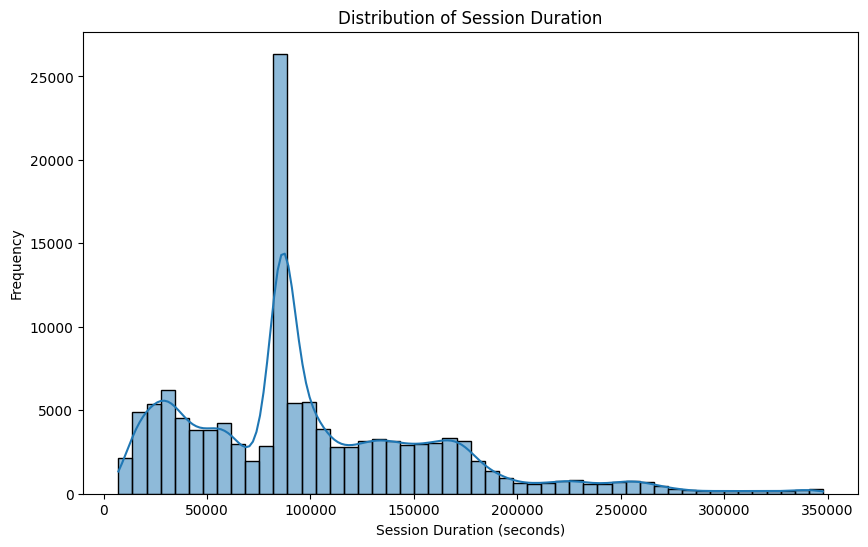

In [24]:
user_analysis.distribution_of_sessionDuration(df_feature)

### Device and Manufacturer Analysis

- Identify the top 10 handsets used by customers.
- Identify the top 3 handset manufacturers.
- Identify the top 5 handsets for the top 3 handset manufacturers.

#### Outlier Detection
- To ensure data quality, checking for outliers in key metrics like Session Duration, Avg RTT, and throughput. Outliers may distort analysis and predictive modeling.

In [25]:
# user_analysis.correlation_matrix(df_feature)

### User Segmentation Based on Device Preferences

- Segment users based on their device preferences to identify key user groups.

In [26]:
top_10_handsets

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

In [27]:
user_analysis.user_segementation_basedOn_handset(df_feature,top_10_handsets)

User Segments:
                                            Handset Type  \
0                            A-Link Telecom I. Cubot A5   
1                     A-Link Telecom I. Cubot Note Plus   
2                          A-Link Telecom I. Cubot Nova   
3                         A-Link Telecom I. Cubot Power   
4                            A-Link Telecom I. Cubot R9   
...                                                 ...   
1303                                          Zte Mf259   
1304  Zte Racer Iii Mini Zte Switch X1 Bouygues Tele...   
1305                               Zte Starxtrem By Sfr   
1306  Zte Zte Blade C2 Smartphone Android By Sfr Sta...   
1307                                          undefined   

                         Handset Manufacturer  Session_Duration  \
0     A-Link Telecom International Co Limited      12060.000000   
1     A-Link Telecom International Co Limited      17940.000000   
2     A-Link Telecom International Co Limited      30360.000000   
3     A

### Segmentation and Clustering
- Once the dataset is cleaned, clustering can be applied to segment users based on network performance and engagement metrics.

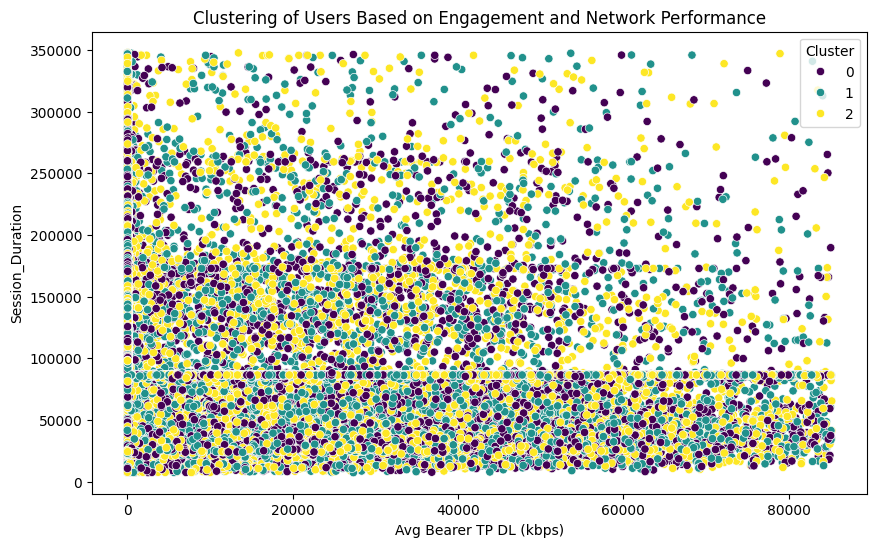

In [28]:
user_analysis.user_segementation(df_feature)